## Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import cv2

In [89]:
import warnings
warnings.filterwarnings("ignore")

==========

## Traffic Signs 

Dataset Source: https://www.kaggle.com/code/shivank856/gtsrb-cnn-98-test-accuracy/data

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


In [90]:
# from IPython.display import Image
# Image("imgs/lenet.png")

In [91]:
# from IPython.display import Image
# Image("imgs/traffic-signs-cnn.png")

## Importing & Inspecting Data

In [92]:
train = pd.read_pickle('traffic-signs-data/train.p')
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [93]:
X_train, y_train = train['features'], train['labels']

In [94]:
valid = pd.read_pickle('traffic-signs-data/valid.p')

In [95]:
X_valid, y_valid = valid['features'], valid['labels']

In [96]:
test = pd.read_pickle('traffic-signs-data/test.p')


In [97]:
X_test, y_test = test['features'], test['labels']

In [98]:
X_train.shape

(34799, 32, 32, 3)

In [99]:
y_train.shape

(34799,)

## EDA

9

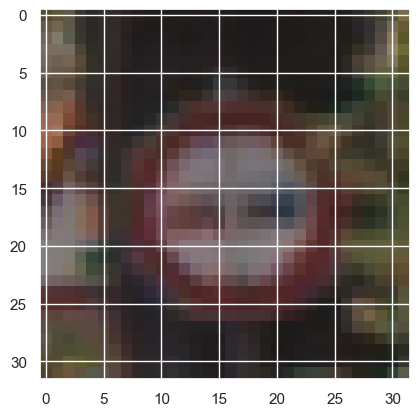

In [100]:
plt.imshow(X_train[11234])
y_train[11234]

## Data Preprocessing

#####  Shuffling Data

In [101]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [102]:
# Convert images to grayscale
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
X_valid_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_valid])

# Reshape to add the single color channel for compatibility
X_train_gray = X_train_gray[..., np.newaxis]
X_test_gray = X_test_gray[..., np.newaxis]
X_valid_gray = X_valid_gray[..., np.newaxis]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Flatten the images to fit into the scaler
X_train_flat = X_train_gray.reshape(-1, X_train_gray.shape[1] * X_train_gray.shape[2])
X_test_flat = X_test_gray.reshape(-1, X_test_gray.shape[1] * X_test_gray.shape[2])
X_valid_flat = X_valid_gray.reshape(-1, X_valid_gray.shape[1] * X_valid_gray.shape[2])

# Fit the scaler on the training data and transform the data
X_train_gray_norm = scaler.fit_transform(X_train_flat)
X_test_gray_norm = scaler.transform(X_test_flat)
X_valid_gray_norm = scaler.transform(X_valid_flat)

# Reshape back to the original image shape
X_train_gray_norm = X_train_gray_norm.reshape(X_train_gray.shape)
X_test_gray_norm = X_test_gray_norm.reshape(X_test_gray.shape)
X_valid_gray_norm = X_valid_gray_norm.reshape(X_valid_gray.shape)

print(X_train_gray_norm.shape)
print(X_test_gray_norm.shape)
print(X_valid_gray_norm.shape)


(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


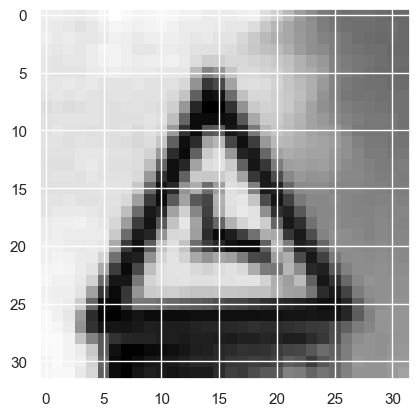

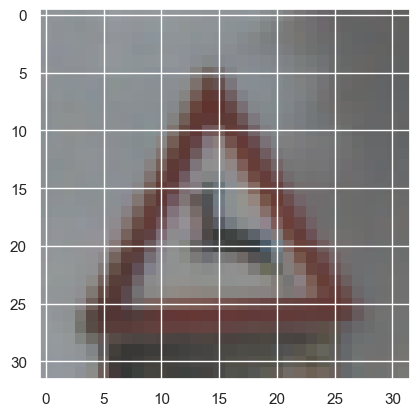

In [103]:
plt.imshow(X_train_gray[1000].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[1000])

## Data Augmentation

In [173]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

aug.fit(X_train)


## Training & Building Model

In [184]:
def create_cnn_model(input_shape=(32, 32, 1), num_classes=43):
    model = Sequential()

    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())

    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D())

    # add more layers
    # model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    # model.add(MaxPooling2D())


    model.add(Flatten())

    model.add(Dense(units=120, activation='relu'))
    # model.add(Dropout(0.1))  # Adding dropout after the first dense layer

    model.add(Dense(units=84, activation='relu'))
    # model.add(Dropout(0.3))  # Adding dropout after the second dense layer

    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model

# Create the CNN model with dropout
cnn_model = create_cnn_model()

# Print the model summary
cnn_model.summary()



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:
# history = cnn_model.fit(X_train_gray_norm,
#                         y_train,
#                         batch_size=200,
#                         epochs=10,
#                         verbose=1,
#                         validation_data = (X_valid_gray_norm,y_valid))

In [186]:
history = cnn_model.fit(
    aug.flow(X_train_gray_norm, y_train, batch_size=500),
    steps_per_epoch=len(X_train) // 500,  # Adjusted batch size for steps_per_epoch
    epochs=30,
    verbose=1,
    validation_data=(X_valid_gray_norm, y_valid)
)

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.0662 - loss: 3.5866 - val_accuracy: 0.2039 - val_loss: 3.0771
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1840 - loss: 3.0912 - val_accuracy: 0.2236 - val_loss: 3.0462
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.2377 - loss: 2.8402 - val_accuracy: 0.4265 - val_loss: 2.1013
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3880 - loss: 2.2891 - val_accuracy: 0.4061 - val_loss: 2.1016
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.3842 - loss: 2.1879 - val_accuracy: 0.5440 - val_loss: 1.6101
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4220 - loss: 1.9572 - val_accuracy: 0.5358 - val_loss: 1.5957
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.4909 - loss: 1.7864 - val_accuracy: 0.6082 - val_loss: 1.3528
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 1.4927 - val_accuracy: 0.5959 - val

## Evaluation 

In [187]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8340


In [188]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

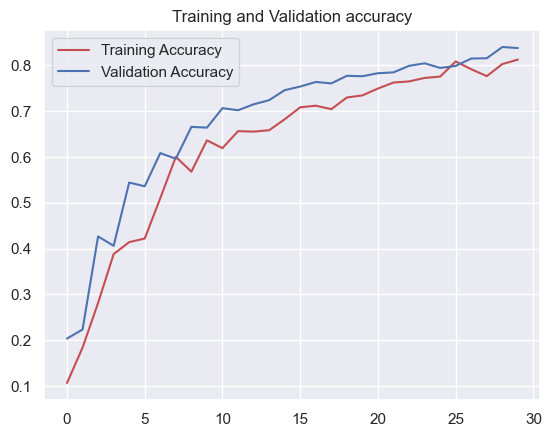

In [189]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


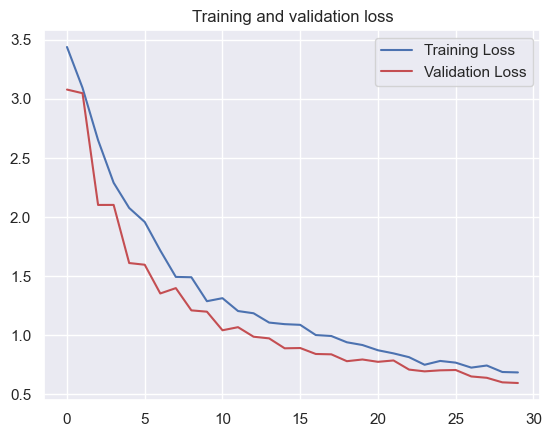

In [190]:
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# THANK YOU!